In [50]:
import json
import requests
import pandas as pd
import plotly.graph_objs as go 

#### using json as file

In [15]:
with open("/Users/elizabethjohnson/Downloads/DisProt release_2021_12 with_ambiguous_evidences.json") as in_file:
  file_contents = in_file.read()
  json_data = json.loads(file_contents)
  new_df = pd.json_normalize(json_data, record_path = "data")

display(new_df.head(10).dropna(axis=1))

,uniref50,sequence,taxonomy,uniref90,disprot_id,ncbi_taxon_id,regions_counter,creator,regions,released,...,dataset,uniparc,UniParc,disorder_content,features.pfam,disprot_consensus.full,disprot_consensus.interaction_partner,disprot_consensus.structural_transition,disprot_consensus.structural_state,disprot_consensus.disorder_function
0,UniRef50_P03265,MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...,"[Viruses, Varidnaviria, Bamfordvirae, Preplasm...",UniRef90_P03265,DP00003,28285,4,gminervini,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[Viral proteins],UPI000012961D,UPI000012961D,0.098299,"[{'start': 184, 'end': 262, 'id': 'PF02236', '...","[{'start': 294, 'end': 334, 'type': 'D'}, {'st...",[],[],"[{'start': 294, 'end': 334, 'type': 'D'}, {'st...",[]
1,UniRef50_P49913,MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...,"[Eukaryota, Metazoa, Chordata, Craniata, Verte...",UniRef90_P49913,DP00004,9606,4,dpiovesan,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI0000000A67,UPI0000000A67,0.217647,"[{'start': 136, 'end': 163, 'id': 'PF12153', '...","[{'start': 134, 'end': 170, 'type': 'T'}]",[],"[{'start': 134, 'end': 170, 'type': 'T'}]","[{'start': 134, 'end': 170, 'type': 'D'}]","[{'start': 134, 'end': 170, 'type': 'F'}]"
2,UniRef50_P03045,MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...,"[Viruses, Duplodnaviria, Heunggongvirae, Urovi...",UniRef90_P03045,DP00005,10710,18,aschramm,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[Viral proteins],UPI000013364C,UPI000013364C,1.000000,"[{'start': 2, 'end': 36, 'id': 'PF11438', 'nam...","[{'start': 1, 'end': 107, 'type': 'I'}]","[{'start': 1, 'end': 107, 'type': 'I'}]","[{'start': 1, 'end': 36, 'type': 'T'}]","[{'start': 1, 'end': 107, 'type': 'D'}]","[{'start': 1, 'end': 107, 'type': 'F'}]"
3,UniRef50_P99999,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,"[Eukaryota, Metazoa, Chordata, Craniata, Verte...",UniRef90_P00004,DP00006,9796,12,cbassot,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI000011054E,UPI000011054E,0.990476,"[{'start': 4, 'end': 101, 'id': 'PF00034', 'na...","[{'start': 1, 'end': 104, 'type': 'I'}]","[{'start': 1, 'end': 104, 'type': 'I'}]","[{'start': 1, 'end': 104, 'type': 'T'}]","[{'start': 1, 'end': 104, 'type': 'D'}]",[]
4,UniRef50_P27695,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...,"[Eukaryota, Metazoa, Chordata, Craniata, Verte...",UniRef90_P27695,DP00007,9606,8,imicetic,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI0000125C38,UPI0000125C38,0.135220,"[{'start': 66, 'end': 309, 'id': 'PF03372', 'n...","[{'start': 1, 'end': 43, 'type': 'D'}]",[],[],"[{'start': 1, 'end': 43, 'type': 'D'}]",[]
5,UniRef50_Q64693,MLWQKSTAPEQAPAPPRPYQGVRVKEPVKELLRRKRGHTSVGAAGP...,"[Eukaryota, Metazoa, Chordata, Craniata, Verte...",UniRef90_Q64693,DP00008,10090,24,mnecci,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI000016CC3E,UPI000016CC3E,1.000000,"[{'start': 7, 'end': 255, 'id': 'PF09310', 'na...","[{'start': 1, 'end': 256, 'type': 'I'}]","[{'start': 1, 'end': 256, 'type': 'I'}]","[{'start': 1, 'end': 65, 'type': 'T'}]","[{'start': 1, 'end': 256, 'type': 'D'}]",[]
6,UniRef50_P32774,MAVPGYYELYRRSTIGNSLVDALDTLISDGRIEASLAMRVLETFDK...,"[Eukaryota, Fungi, Dikarya, Ascomycota, Saccha...",UniRef90_P32774,DP00009,559292,2,dpiovesan,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI00001370FA,UPI00001370FA,0.131148,"[{'start': 6, 'end': 53, 'id': 'PF02268', 'nam...","[{'start': 89, 'end': 104, 'type': 'D'}]",[],[],"[{'start': 89, 'end': 104, 'type': 'D'}]","[{'start': 89, 'end': 104, 'type': 'F'}]"
7,UniRef50_P0DMM9,MELIQDTSRPPLEYVKGVPLIKYFAEALGPLQSFQARPDDLLINTY...,"[Eukaryota, Metazoa, Chordata, Craniata, Verte...",UniRef90_P0DMM9,DP00011,9606,7,agasparini,"[{'term_namespace': 'Structural state', 'ec_on...",2016_10,...,[],UPI0000046BED,UPI0000046BED,0.203390,"[{'start': 38, 'end': 287, 'id': 'PF00685', 'n...","[{'start': 63, 'end': 76, 'typ

In [59]:
fig_his = go.Figure(go.Histogram(x= new_df["disorder_content"]))
fig_his.update_layout(xaxis_range=[0,1], xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 0.1),
        title= "Distribution of Disorder Content of 2300 IDPs in DisProt Database",
        xaxis_title="disorder content (0 to 1)",
        yaxis_title="Number of Proteins")
fig_his.show()

In [39]:
low_disorder = new_df.loc[(new_df['disorder_content'] <= 0.2), ['uniref50','sequence','disorder_content']]
low_disorder.loc[:,'disorder'] = "low (< 0.2)"
low_disorder

,uniref50,sequence,disorder_content,disorder
0,UniRef50_P03265,MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...,0.098299,low (< 0.2)
4,UniRef50_P27695,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...,0.135220,low (< 0.2)
6,UniRef50_P32774,MAVPGYYELYRRSTIGNSLVDALDTLISDGRIEASLAMRVLETFDK...,0.131148,low (< 0.2)
8,UniRef50_P13569,MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSA...,0.125000,low (< 0.2)
16,UniRef50_Q5SHN5,MAVKVEYDLKRLRNIGIAAHIDAGKTTTTERILYYTGRIHKIGEVH...,0.040521,low (< 0.2)
...,...,...,...,...
2360,UniRef50_P16285,MDADKIVFKVNNQVVSLKPEIIVDQYEYKYPAIKDLKKPCITLGKA...,0.048889,low (< 0.2)
2362,UniRef50_P03431,MDVNPTLLFLKVPAQNAISTTFPYTGDPPYSHGTGTGYTMDTVNRT...,0.072655,low (< 0.2)
2363,UniRef50_P03466,MATKGTKRSYEQMETDGERQNATEIRASVGKMIDGIGRFYIQMCTE...,0.100402,low (< 0.2)
2364,UniRef50_P03495,MDPNTVSSFQVDCFLWHVRKRVADQELGDAPFLDRLRRDQKSLRGR...,0.160870,low (< 0.2)


In [41]:
some_disorder = new_df.loc[(new_df['disorder_content'] > 0.2) & (new_df['disorder_content'] <= 0.4), ['uniref50','sequence','disorder_content']]
some_disorder.loc[:,'disorder'] = "some (0.2, 0.4]"
some_disorder

,uniref50,sequence,disorder_content,disorder
1,UniRef50_P49913,MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...,0.217647,"some (0.2, 0.4]"
7,UniRef50_P0DMM9,MELIQDTSRPPLEYVKGVPLIKYFAEALGPLQSFQARPDDLLINTY...,0.203390,"some (0.2, 0.4]"
9,UniRef50_P0DN86,MEMFQGLLLLLLLSMGGTWASKEPLRPRCRPINATLAVEKEGCPVC...,0.206061,"some (0.2, 0.4]"
10,UniRef50_P10909,MKILLLCVALLLTWDNGMVLGEQEFSDNELQELSTQGSRYVNKEIQ...,0.255034,"some (0.2, 0.4]"
20,UniRef50_P06179,MAQVINTNSLSLLTQNNLNKSQSALGTAIERLSSGLRINSAKDDAA...,0.212121,"some (0.2, 0.4]"
...,...,...,...,...
2316,UniRef50_A6TBX4,MSMSTSTEVIAHHWAFAIFLIVAIGLCCLMLVGGWFLGGRARARSK...,0.374150,"some (0.2, 0.4]"
2317,UniRef50_Q89933,MATLLRSLALFKRNKDKPPITSGSGGAIRGIKHIIIVPIPGDSSIT...,0.289524,"some (0.2, 0.4]"
2329,UniRef50_Q9NP98,MPLSGTPAPNKKRKSSKLIMELTGGGQESSGLNLGKKISVPRDVML...,0.270903,"some (0.2, 0.4]"
2346,UniRef50_P05453,MSDSNQGNNQQNYQQYSQNGNQQQGNNRYQGYQAYNAQAQPAGGYY...,0.364964,"some (0.2, 0.4]"


In [32]:
mid_disorder = new_df.loc[(new_df['disorder_content'] > 0.4) & (new_df['disorder_content'] <= 0.6), ['uniref50','sequence','disorder_content']]
mid_disorder

,uniref50,sequence,disorder_content
15,UniRef50_P11938,MSSPDDFETAPAEYVDALDPSMVVVDSGSAAVTAPSDSAAEVKANQ...,0.465538
18,UniRef50_P03129,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,0.469388
27,UniRef50_P10912,MDLWQLLLTLALAGSSDAFSGSEATAAILSRAPWSLQSVNPGLKTN...,0.550157
36,UniRef50_P02259,MTESLVLSPAPAKPKRVKASRRSASHPTYSEMIAAAIRAEKSRGGS...,0.594737
51,UniRef50_Q2G0L4,MLNRENKTAITRKGMVSNRLNKFSIRKYTVGTASILVGTTLIFGLG...,0.518631
...,...,...,...
2269,UniRef50_Q8I295,MSVTTFCSLKKTDKCNIYISKRAFSVFLFYLFFFLFFHFYFLCSSS...,0.405607
2285,UniRef50_Q13177,MSDNGELEDKPPAPPVRMSSTIFSTGGKDPLSANHSLKPLPSVPEE...,0.471374
2330,UniRef50_P05923,MQPLQILAIVALVVAAIIAIVVWTIVYIEYRKILRQRKIDRLIDRI...,0.530864
2338,UniRef50_O73557,MGNKQVKAPEARNSPRASLIPDATHLGPQFCKSCWFENKGLVECNN...,0.505051


In [33]:
high_disorder = new_df.loc[(new_df['disorder_content'] > 0.6) & (new_df['disorder_content'] <= 0.8), ['uniref50','sequence','disorder_content']]
high_disorder

,uniref50,sequence,disorder_content
75,UniRef50_P23025,MEPEPEPEQEANKEEEKILSAAVRAKIERNRQRALMLRQARLACRP...,0.632959
79,UniRef50_P07305,MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...,0.659794
92,UniRef50_P31109,MSSSTPFDPYALSEHDEERPQNVQSKSRTAELQAEIDDTVGIMRDN...,0.794872
103,UniRef50_P22531,MSYQQQQCKQPCQPPPVCPTPKCPEPCPPPKCPEPCPPPKCPQPCP...,0.625000
105,UniRef50_P35974,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,0.759369
...,...,...,...
2201,UniRef50_P0AG69,MTESFAQLFEESLKEIETRPGSIVRGVVVAIDKDVVLVDAGLKSES...,0.709156
2209,UniRef50_Q9A8N4,MSDQSQEPTMEEILASIRRIISEDDAPAEPAAEAAPPPPPEPEPEP...,0.751412
2223,UniRef50_P23025,MEPEPEQEANKEEEKILSAAVRAKIERNRQRALMLRQARLACRPYP...,0.637736
2259,UniRef50_P10997,MGILKLQVFLIVLSVALNHLKATPIESHQVEKRKCNTATCATQRLA...,0.752809


In [34]:
very_disorder = new_df.loc[(new_df['disorder_content'] > 0.8), ['uniref50','sequence','disorder_content']]
very_disorder

,uniref50,sequence,disorder_content
2,UniRef50_P03045,MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...,1.000000
3,UniRef50_P99999,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,0.990476
5,UniRef50_Q64693,MLWQKSTAPEQAPAPPRPYQGVRVKEPVKELLRRKRGHTSVGAAGP...,1.000000
11,UniRef50_P61925,MTDVETTYADFIASGRTGRRNAIHDILVSSASGNSNELALKLAGLD...,1.000000
12,UniRef50_P38936,MSEPAGDVRQNPCGSKACRRLFGPVDSEQLSRDCDALMAGCIQEAR...,1.000000
...,...,...,...
2353,UniRef50_P04608,MEPVDPRLEPWKHPGSQPKTACTTCYCKKCCFHCQVCFTTKALGIS...,1.000000
2354,UniRef50_P04608,MEPVDPSLEPWKHPGSQPKTACTNCYCKKCCLHCQVCFTTKGLGIS...,1.000000
2355,UniRef50_P04613,MDPVDPNLEPWNHPGSQPRTPCNKCYCKKCCYHCQMCFITKGLGIS...,1.000000
2356,UniRef50_P0C1J9,MDPVDPNLEPWNHPGSQPRTPCNKCHCKKCCYHCPVCFLNKGLGIS...,1.000000


In [16]:
new_df.to_csv('Disprot_allColumns.csv')

In [5]:
simple_df = new_df[["uniref50", "sequence"]]
simple_df

,uniref50,sequence
0,UniRef50_P03265,MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...
1,UniRef50_P49913,MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...
2,UniRef50_P03045,MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...
3,UniRef50_P99999,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...
4,UniRef50_P27695,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...
...,...,...
2361,UniRef50_P05777,MSLLTEVETYVLSIIPSGPLKAEIAQRLEDVFAGKNTDLEVLMEWL...
2362,UniRef50_P03431,MDVNPTLLFLKVPAQNAISTTFPYTGDPPYSHGTGTGYTMDTVNRT...
2363,UniRef50_P03466,MATKGTKRSYEQMETDGERQNATEIRASVGKMIDGIGRFYIQMCTE...
2364,UniRef50_P03495,MDPNTVSSFQVDCFLWHVRKRVADQELGDAPFLDRLRRDQKSLRGR...


In [6]:
simple_df.to_csv('Disprot_sequence.csv', index = False)

In [7]:
list(json_data["data"][0].keys())

['features',
 'uniref50',
 'sequence',
 'taxonomy',
 'uniref90',
 'disprot_id',
 'ncbi_taxon_id',
 'regions_counter',
 'creator',
 'regions',
 'released',
 'uniref100',
 'date',
 'acc',
 'name',
 'length',
 'organism',
 'dataset',
 'uniparc',
 'UniParc',
 'disorder_content',
 'disprot_consensus']

In [11]:
new_df.info

<bound method DataFrame.info of              uniref50                                           sequence  \
0     UniRef50_P03265  MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...   
1     UniRef50_P49913  MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...   
2     UniRef50_P03045  MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...   
3     UniRef50_P99999  MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...   
4     UniRef50_P27695  MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...   
...               ...                                                ...   
2361  UniRef50_P05777  MSLLTEVETYVLSIIPSGPLKAEIAQRLEDVFAGKNTDLEVLMEWL...   
2362  UniRef50_P03431  MDVNPTLLFLKVPAQNAISTTFPYTGDPPYSHGTGTGYTMDTVNRT...   
2363  UniRef50_P03466  MATKGTKRSYEQMETDGERQNATEIRASVGKMIDGIGRFYIQMCTE...   
2364  UniRef50_P03495  MDPNTVSSFQVDCFLWHVRKRVADQELGDAPFLDRLRRDQKSLRGR...   
2365  UniRef50_P03470  MNPNQKIITIGSVCMTIGMANLILQIGNIISIWISHSIQLGNQNQI...   

                                               taxonomy

In [28]:
new_df["taxonomy"][0]

['Viruses',
 'Varidnaviria',
 'Bamfordvirae',
 'Preplasmiviricota',
 'Tectiliviricetes',
 'Rowavirales',
 'Adenoviridae',
 'Mastadenovirus']

In [8]:
# fixing the value of lists
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [9]:
list_count_tax = to_1D(new_df["taxonomy"]).value_counts()
list_count_tax

Eukaryota         1798
Metazoa           1411
Vertebrata        1282
Craniata          1282
Chordata          1282
                  ... 
Tymovirales          1
Coix                 1
Coicinae             1
Borreliella          1
Magnaporthales       1
Length: 934, dtype: int64

In [10]:
species_dict = {}
species_dict["Eukaryota"] = list_count_tax.loc["Eukaryota"]
species_dict["Viruses"] = list_count_tax.loc["Viruses"]
species_dict["Bacteria"] = list_count_tax.loc["Bacteria"]
species_dict["Archaea"] = list_count_tax.loc["Archaea"]
species_dict

{'Eukaryota': 1798, 'Viruses': 188, 'Bacteria': 356, 'Archaea': 24}

In [11]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [12]:
taxonomy_bool = boolean_df(new_df["taxonomy"], ['Viruses', 'Eukaryota', 'Bacteria', 'Archaea'])
taxonomy_bool

,Viruses,Eukaryota,Bacteria,Archaea
0,True,False,False,False
1,False,True,False,False
2,True,False,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
2361,True,False,False,False
2362,True,False,False,False
2363,True,False,False,False
2364,True,False,False,False


Text(0.5, 1.0, 'Protein Sequences By Organism Group in Disprot Database')

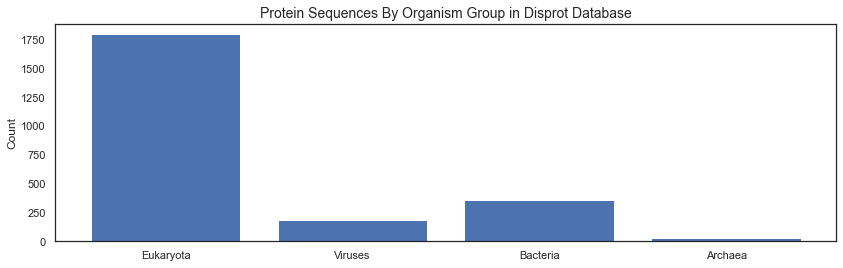

In [60]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(species_dict.keys(),
        species_dict.values())
ax.set_ylabel("Count", size = 12)
ax.set_title("Protein Sequences By Organism Group in Disprot Database", size = 14)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Per Organism
+ Viruses
+ Eukaryota
+ Bacteria
+ Archaea

In [4]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(["Viruses", "Eukaryota", "Bacteria", "Archaea"], 10)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

ValueError: All arrays must be of the same length

#### Viruses
+ Varidnaviria
+ Duplodnaviria
+ Monodnaviria
+ Riboviria
+ Fuselloviridae